In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read a csv file 

In [3]:
df=pd.read_csv("C:\\Users\\ashish\\Downloads\\online_furniture_retailer.csv")
df.head(5)

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


## 1. Create a bar chart showing the total sales (total_amount) by product_category.  Which category generates the highest revenue?

product_category
Bedroom        516730.84
Dining Room    342392.30
Kitchen        480646.75
Living Room    483166.13
Office         295662.96
Outdoor        378300.86
Name: total_amount, dtype: float64

<Axes: xlabel='product_category', ylabel='total_amount'>

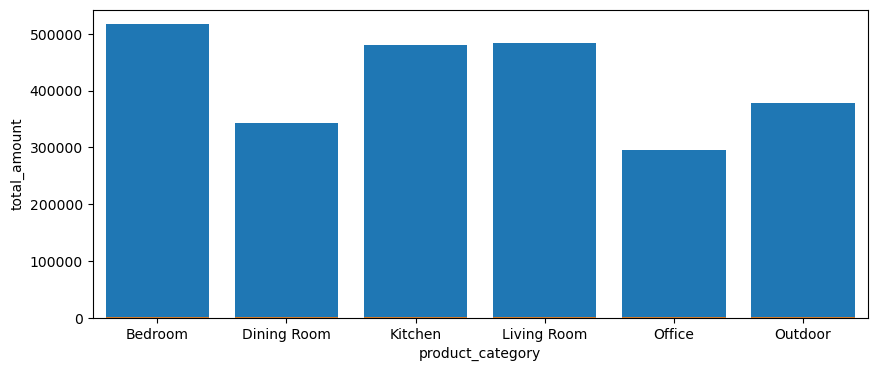

In [24]:
t=df.groupby("product_category")["total_amount"].sum()
display(t)
plt.figure(figsize=(10,4))
plt.bar(t.index,t)
sns.barplot(data=df,x="product_category",y="total_amount")

<Axes: xlabel='product_category', ylabel='total_amount'>

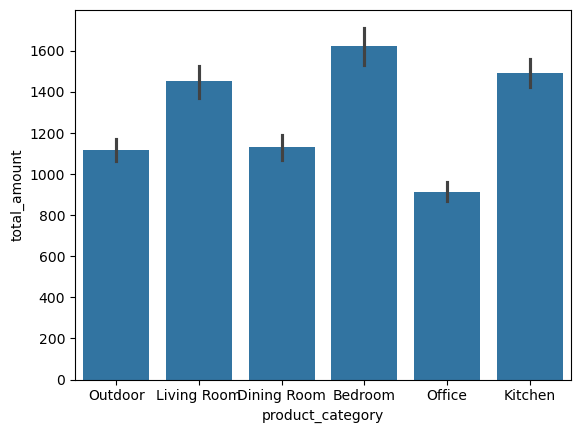

In [25]:
sns.barplot(data=df,x="product_category",y="total_amount")

 # 2. Make a pie chart of delivery_status. What percentage of orders were delivered successfully?

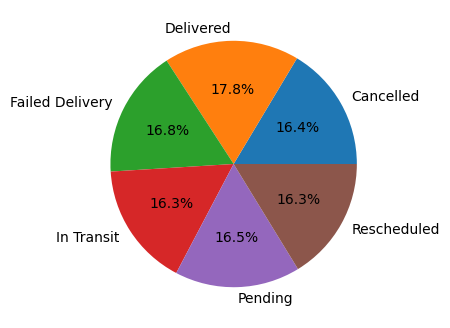

In [28]:
plt.figure(figsize=(4,4))
f=df.groupby("delivery_status")["product_category"].count()
plt.pie(f,labels=f.index, autopct="%1.1f%%")
plt.show()

## 3. Plot the average customer_rating for each brand using a bar chart. Which brand has the highest customer satisfaction?

<BarContainer object of 12 artists>

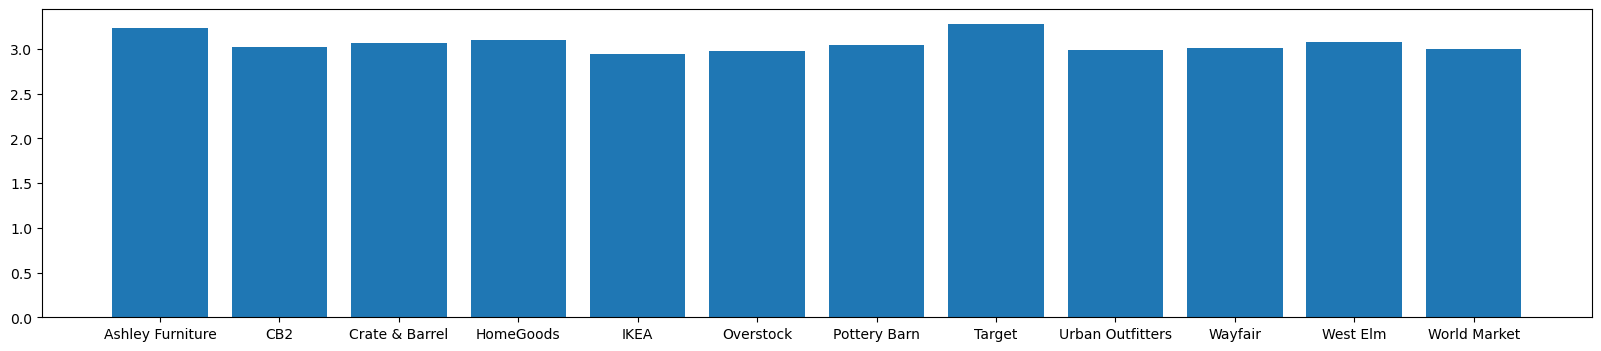

In [36]:
g=df.groupby("brand")["customer_rating"].mean()
plt.figure(figsize=(20,4))
plt.bar(g.index,g)

## 4. Create a scatter plot between product_price and shipping_cost. Do higher-priced products tend to have higher shipping costs?

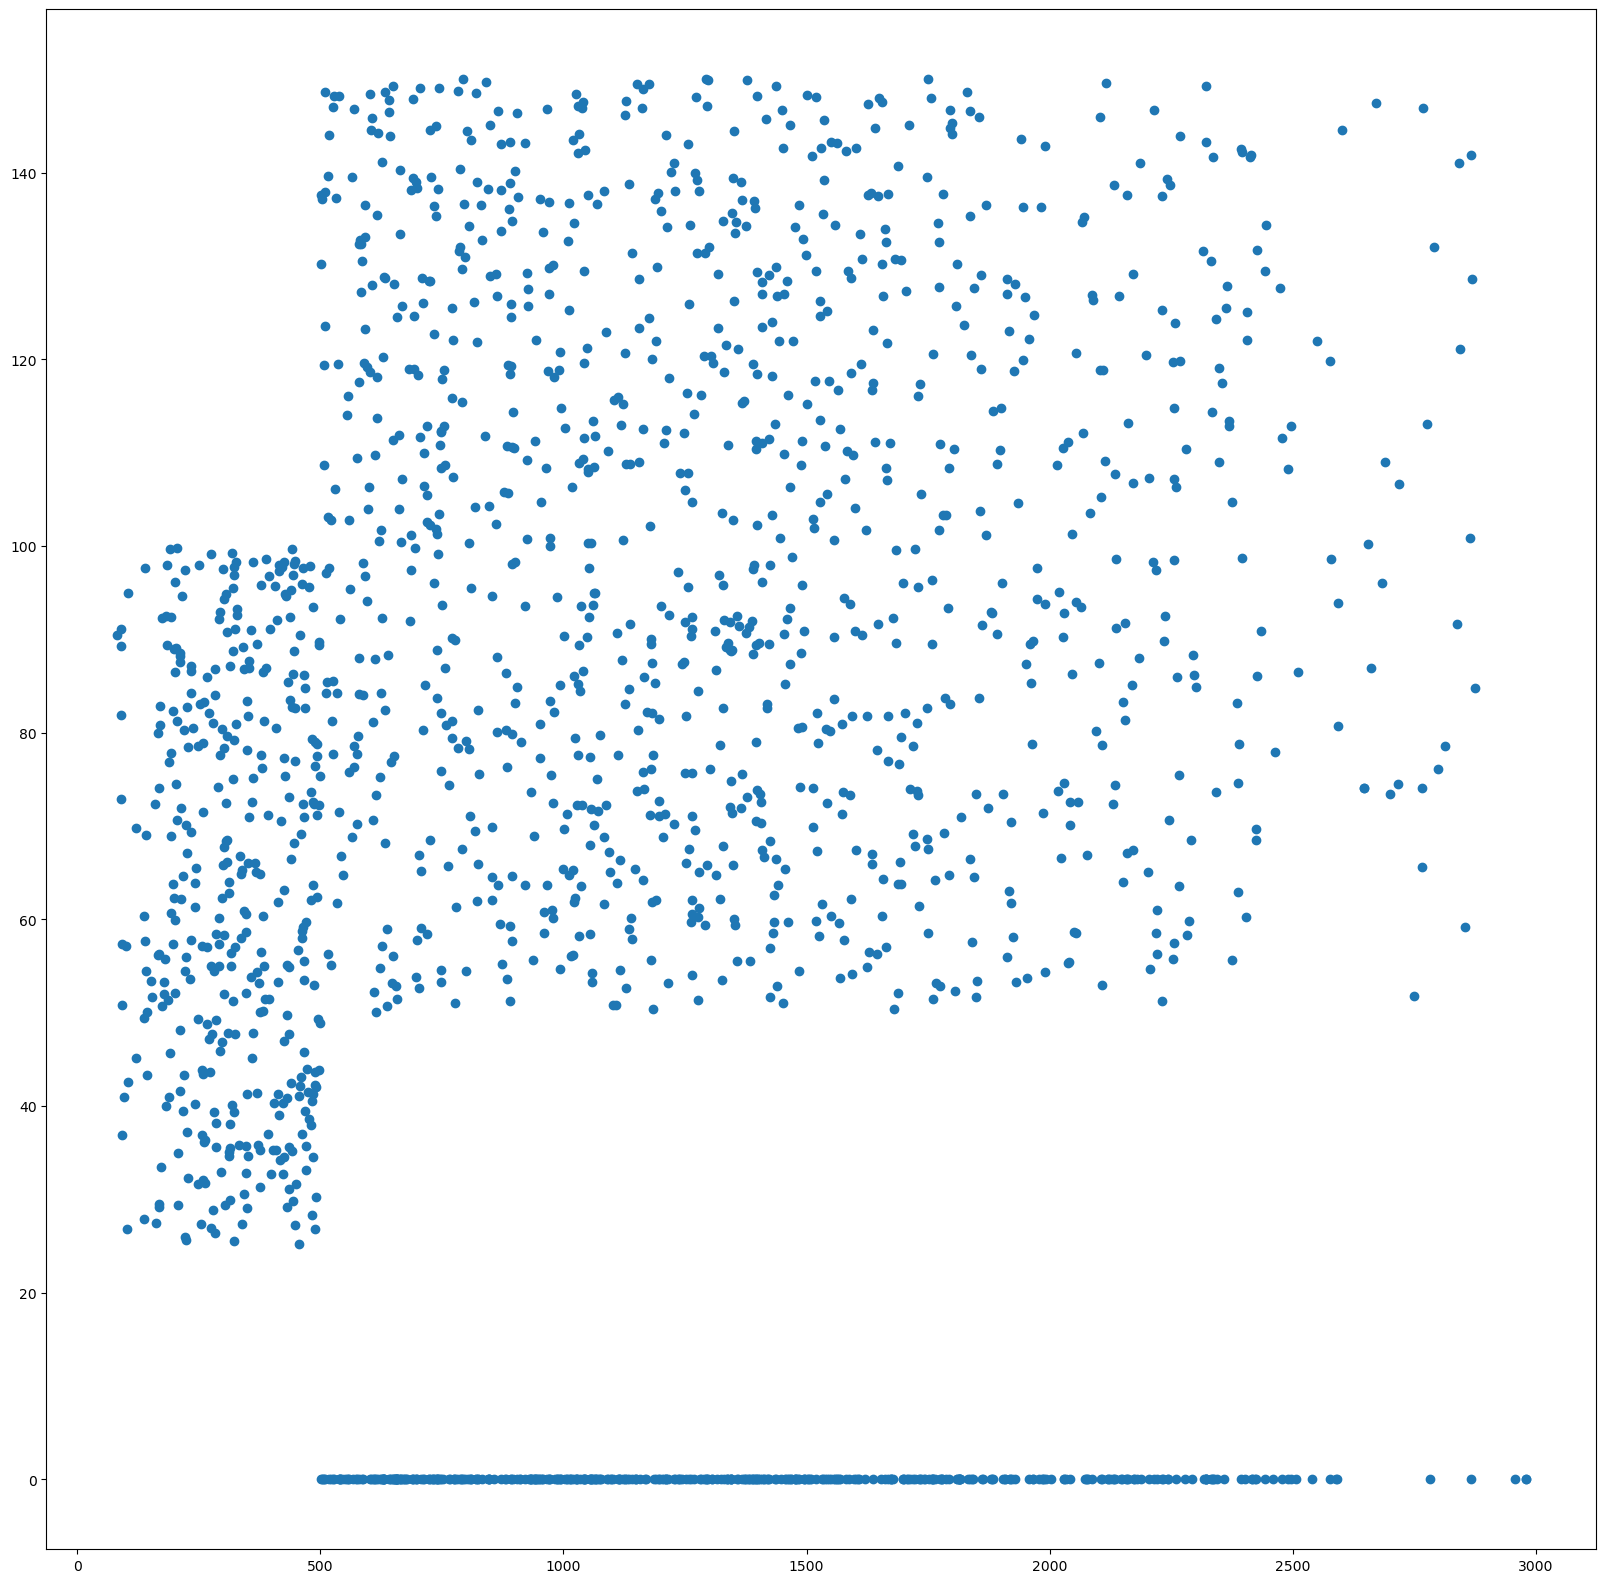

In [39]:
plt.figure(figsize=(20,20))
plt.scatter(df["product_price"],df["shipping_cost"])

## 5. Make a boxplot of total_amount grouped by assembly_service_requested. Does requesting assembly service significantly increase the order amount?

In [43]:
plt.figure(figsize=(20,4))
r=df.groupby("assembly_service_requested")["total_amount"].sum()
sns.boxplot(data=df,x=r.index,y=r)

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 1938 and the vector passed to `x` has length 2.

<Figure size 2000x400 with 0 Axes>

## 6. Use a countplot to show the number of orders by payment_method. Which payment method is used the most?

<Axes: xlabel='payment_method', ylabel='count'>

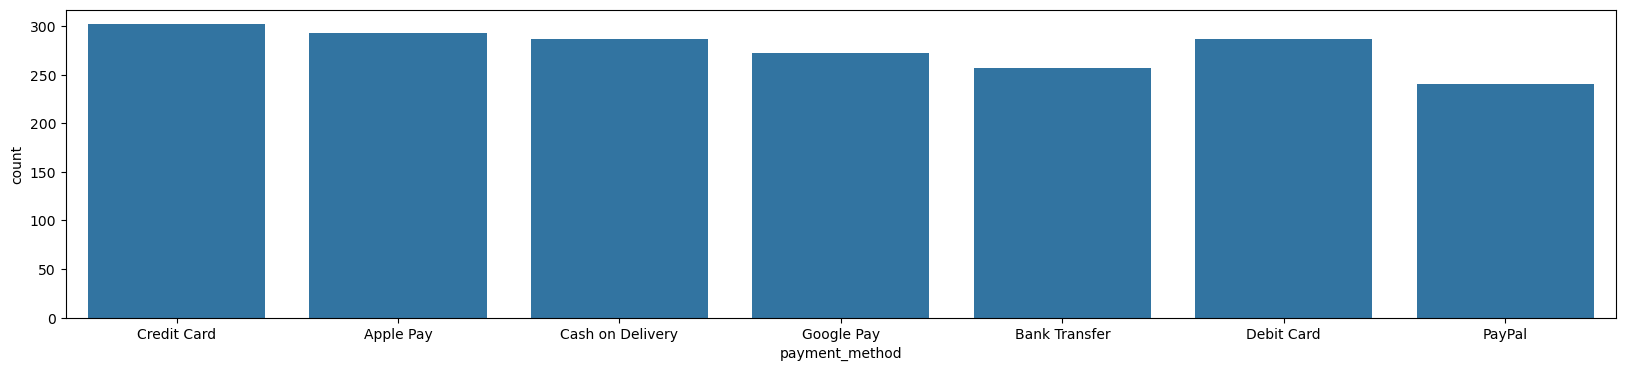

In [45]:
plt.figure(figsize=(20,4))
sns.countplot(data=df,x="payment_method")


## 7. Make a scatter plot between delivery_window_days and customer_rating. Does a longer delivery window reduce customer ratings?

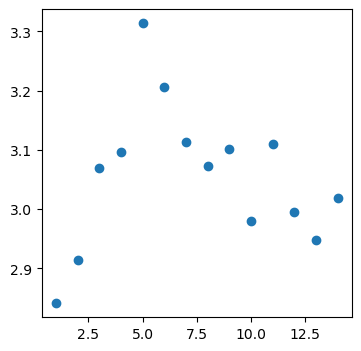

In [6]:
plt.figure(figsize=(4,4))
q=df.groupby("delivery_window_days")["customer_rating"].mean()
plt.scatter(q.index,q)

In [7]:
h=(df.groupby(["delivery_window_days","product_category"])("total_amount").mean().rest_index())
display(h)

TypeError: 'DataFrameGroupBy' object is not callable